In [1]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
from matplotlib import cm
from tqdm import tqdm
import json
import anndata as ad

import matplotlib.pyplot as plt
import seaborn as sns

import scanpy as sc
import squidpy as sq
from scipy.spatial import KDTree
import networkx as nx


from src.slide_utilities import *

import warnings
warnings.filterwarnings('ignore')

In [2]:
adata = sc.read_h5ad("adata/adata_nichepca_with_domain_tuned_per_sample_v3.h5ad")

In [3]:
adata.obs

x            y          z  cluster  \
cell_CRfb095a77d-1       2285.790178  1164.057381  32.829188        1   
cell_CRfb095a77d-2       2298.342622  1219.741069  31.465535        4   
cell_CRfb095a77d-3       2271.434052  1245.859500  32.062796        2   
cell_CRfb095a77d-5       2257.346907  1259.955827  31.273945        2   
cell_CRfb095a77d-6       2277.712022  1237.595244  35.395148        2   
...                              ...          ...        ...      ...   
cell_CRc71d71060-597925  2747.360264  4957.516627  24.097605        2   
cell_CRc71d71060-598041  4592.548620  1655.438877  24.254944        2   
cell_CRc71d71060-598270  8540.113826  9224.561804  19.515240        3   
cell_CRc71d71060-598508  4264.902000  2582.697217  25.121288        3   
cell_CRc71d71060-598872  6724.860296  3216.076611  17.825634        3   

                         n_transcripts  density  elongation   area  \
cell_CRfb095a77d-1                  79   2.0240       2.141  39.03   
cell_CRfb095a77d-2                  32   1.0850       4.614  29.50   
cell_CRfb095a77d-3                  67   3.0590       2.990  21.90   
cell_CRfb095a77d-5                  56   2.1420       9.229  26.14   
cell_CRfb095a77d-6                   9   1.6980       3.283   5.30   
...                                ...      ...         ...    ...   
cell_CRc71d71060-597925             73   1.5480       3.617  47.15   
cell_CRc71d71060-598041             35   0.9893       1.844  35.38   
cell_CRc71d71060-598270             46   1.3870       2.667  33.16   
cell_CRc71d71060-598508             24   1.1420       5.004  21.02   
cell_CRc71d71060-598872             27   1.0900       2.802  24.78   

                         avg_confidence  avg_assignment_confidence  ...  \
cell_CRfb095a77d-1               0.9975                     0.9916  ...   
cell_CRfb095a77d-2               0.9771                     0.9288  ...   
cell_CRfb095a77d-3               0.9971                     0.9884  ...   
cell_CRfb095a77d-5               0.9964                     0.9707  ...   
cell_CRfb095a77d-6               0.9826                     0.9400  ...   
...                                 ...                        ...  ...   
cell_CRc71d71060-597925          0.9971                     0.6334  ...   
cell_CRc71d71060-598041          0.9951                     0.6206  ...   
cell_CRc71d71060-598270          0.9969                     0.7152  ...   
cell_CRc71d71060-598508          0.9914                     0.7517  ...   
cell_CRc71d71060-598872          0.9931                     0.7926  ...   

                         n_genes  celltype_l1  celltype_l1_codes  \
cell_CRfb095a77d-1            55          MAC                  8   
cell_CRfb095a77d-2            17           PT                 16   
cell_CRfb095a77d-3            44          FIB                  6   
cell_CRfb095a77d-5            40          FIB                  6   
cell_CRfb095a77d-6             7          DTL                  4   
...                          ...          ...                ...   
cell_CRc71d71060-597925       10          MAC                  8   
cell_CRc71d71060-598041        6          MAC                  8   
cell_CRc71d71060-598270        8          FIB                  6   
cell_CRc71d71060-598508        6        VSM/P                 20   
cell_CRc71d71060-598872        8     podocyte                 29   

                         celltype_l1_prob     Biopsy_ID sample label  \
cell_CRfb095a77d-1               0.999994  0011695 - X1    X40   SLE   
cell_CRfb095a77d-2               1.000000  0011695 - X1    X40   SLE   
cell_CRfb095a77d-3               1.000000  0011695 - X1    X40   SLE   
cell_CRfb095a77d-5               0.999103  0011695 - X1    X40   SLE   
cell_CRfb095a77d-6               0.582253  0011695 - X1    X40   SLE   
...                                   ...           ...    ...   ...   
cell_CRc71d71060-597925          1.000000  0011216 - X2    X24   SLE   
cell_CRc71d71060-598041

In [9]:
sample_set = adata.obs['sample'].unique()

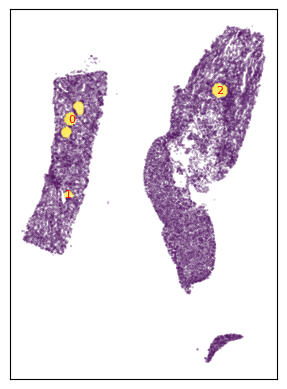

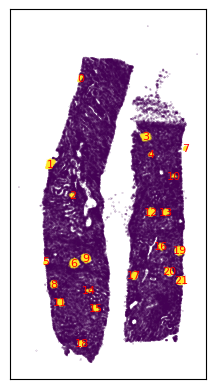

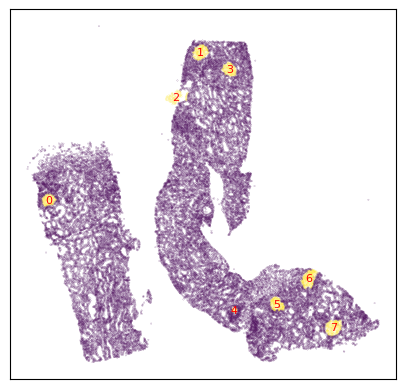

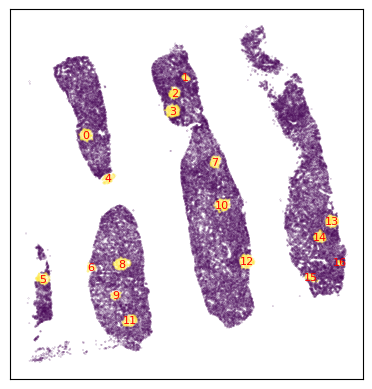

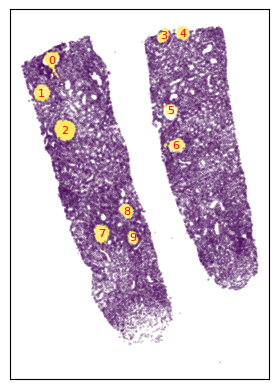

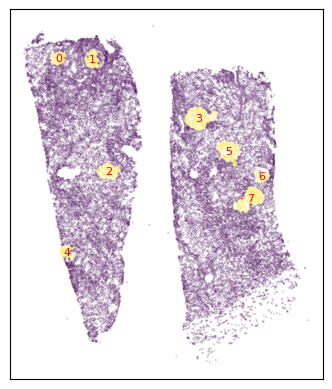

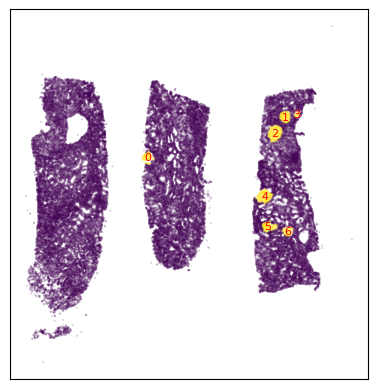

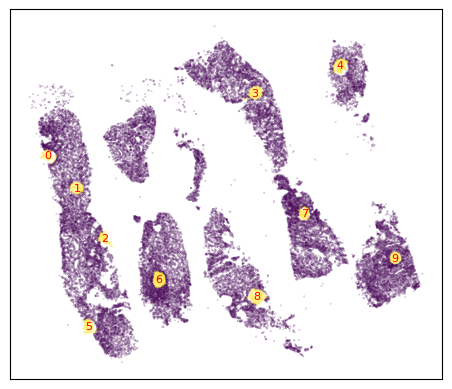

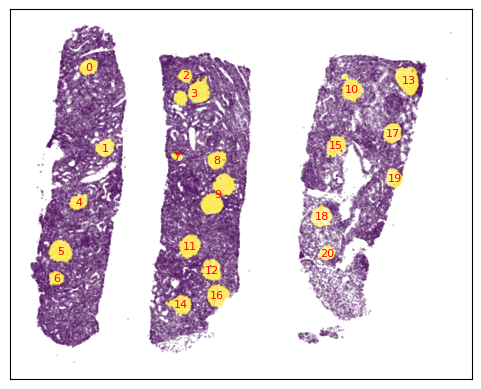

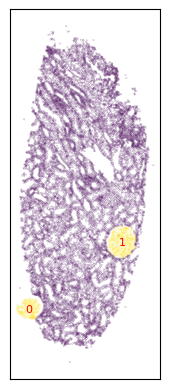

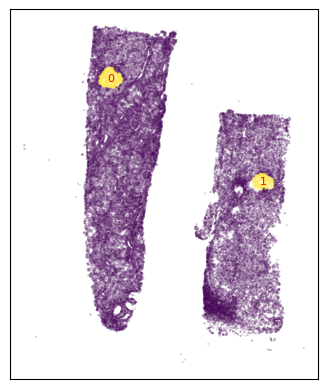

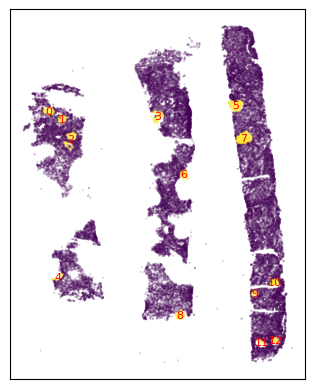

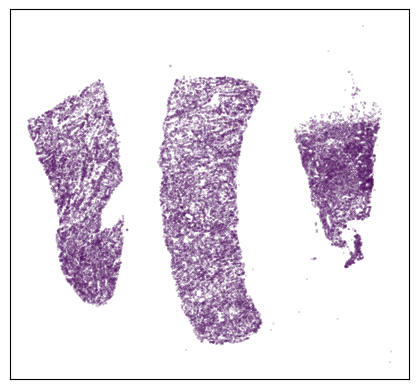

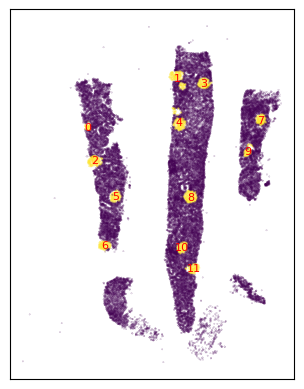

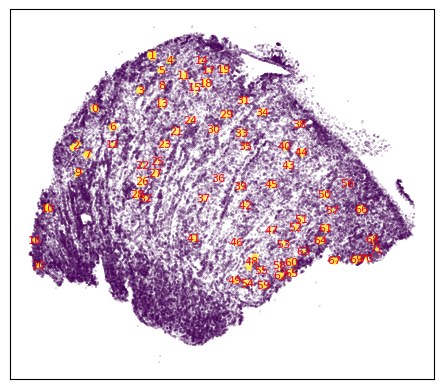

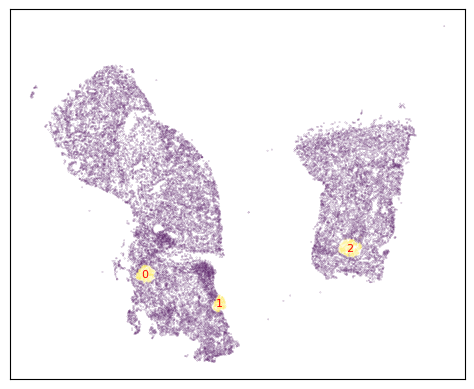

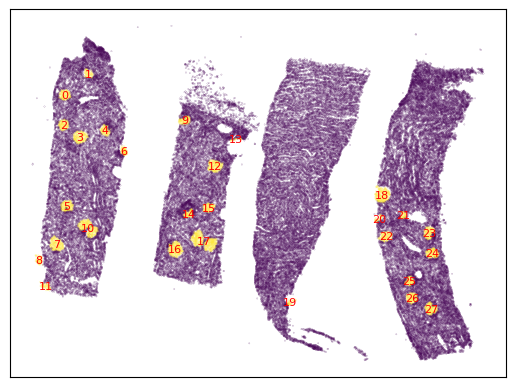

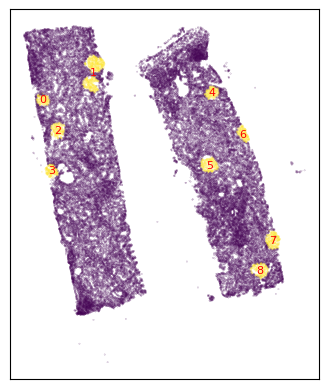

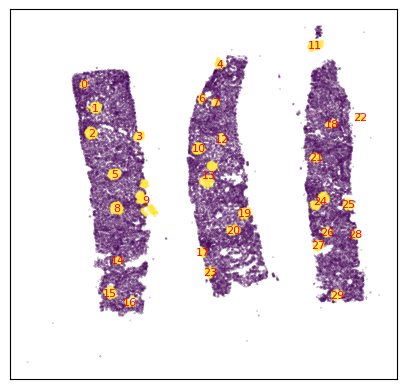

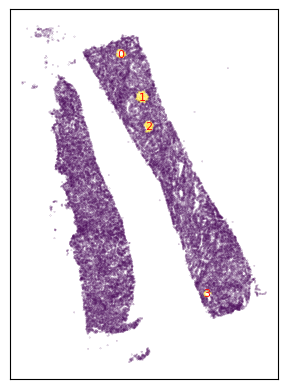

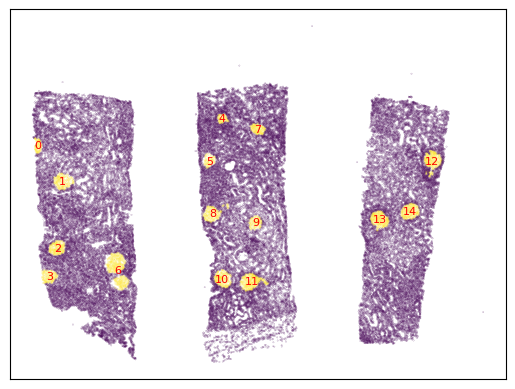

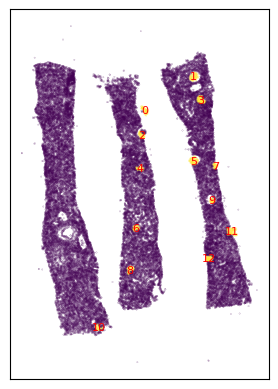

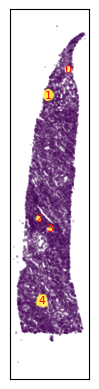

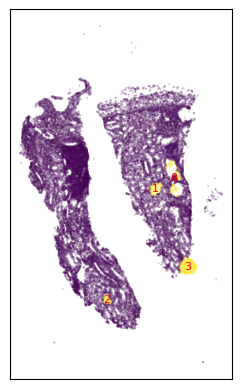

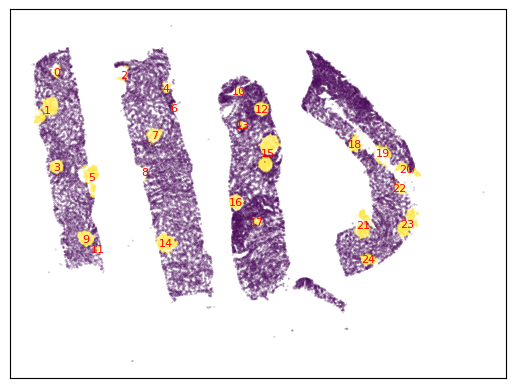

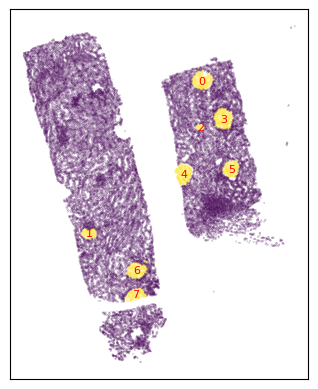

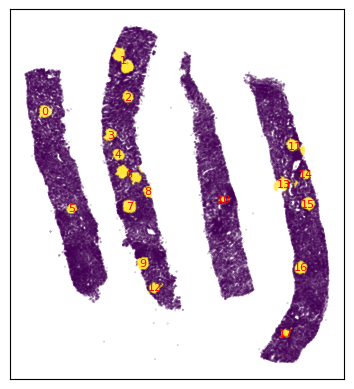

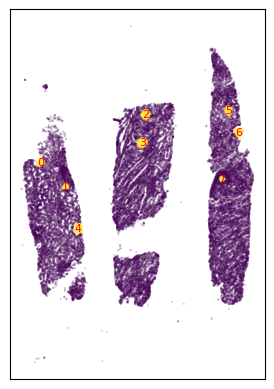

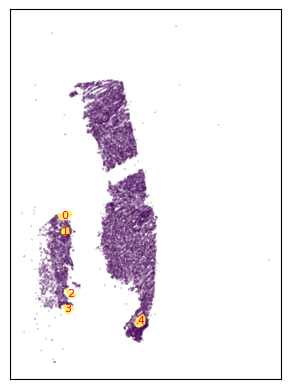

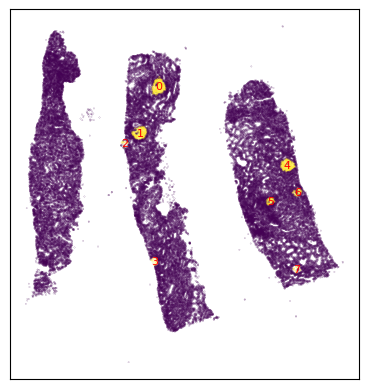

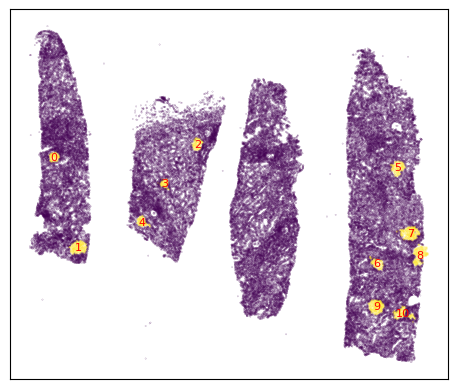

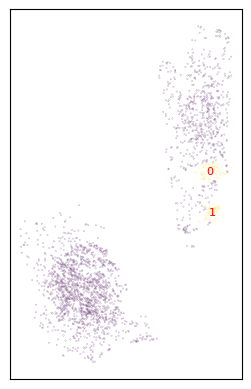

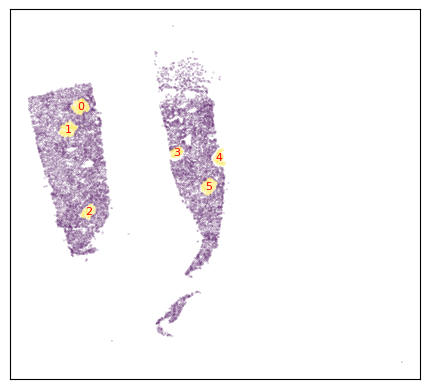

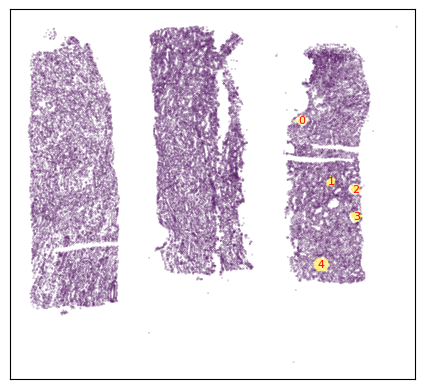

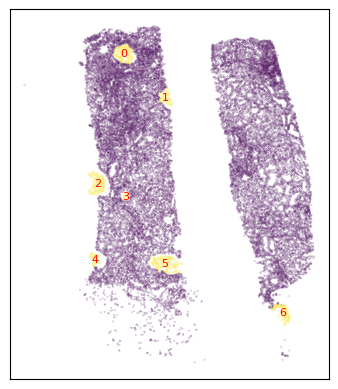

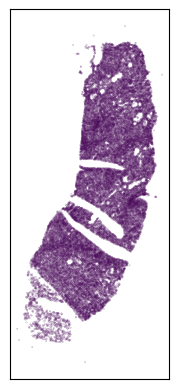

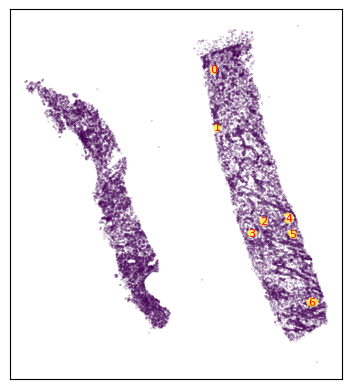

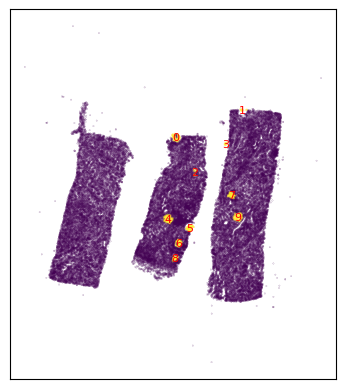

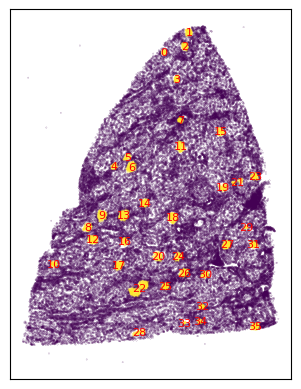

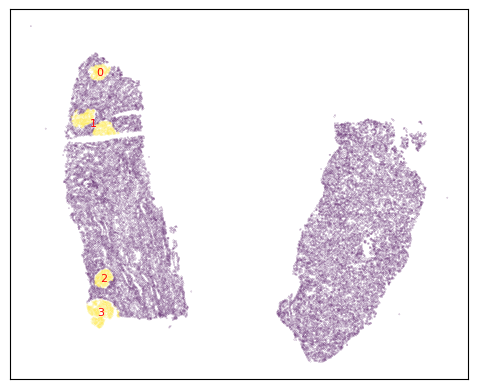

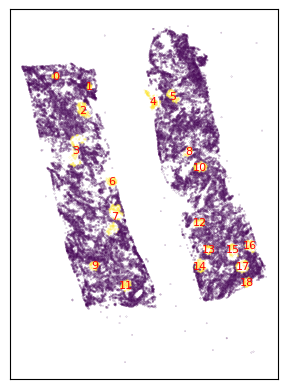

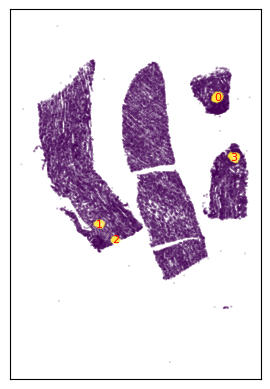

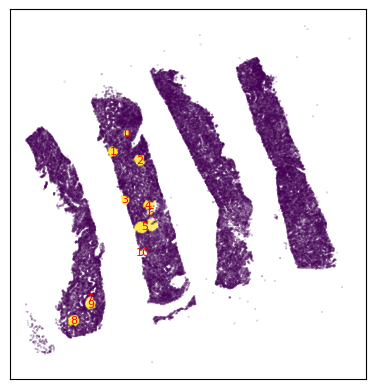

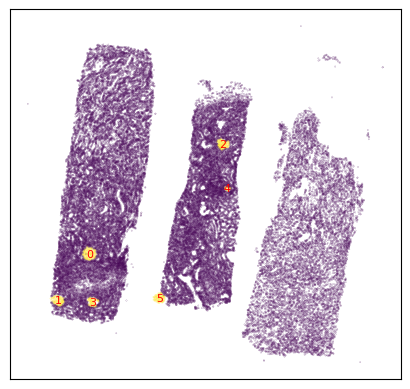

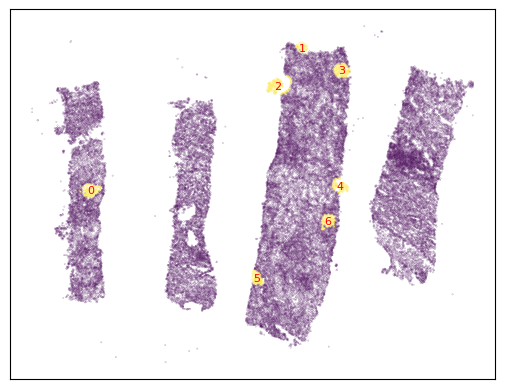

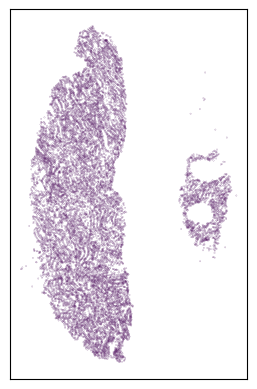

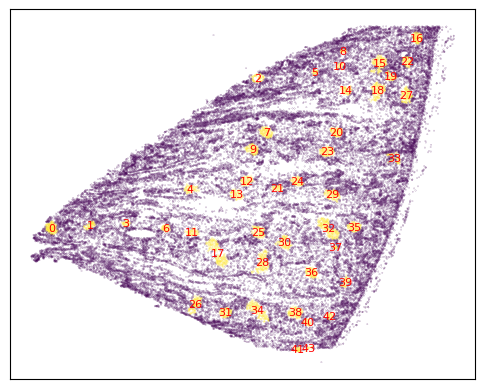

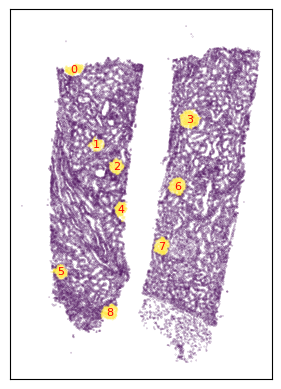

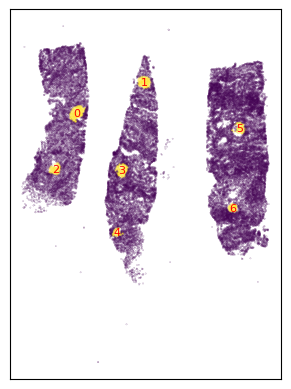

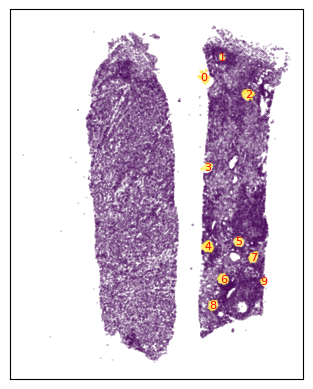

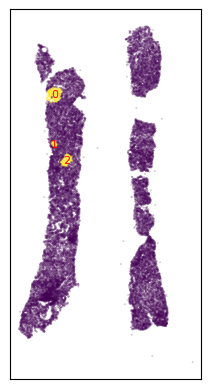

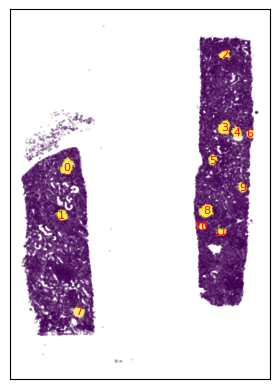

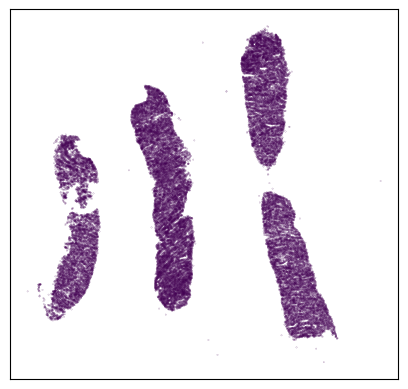

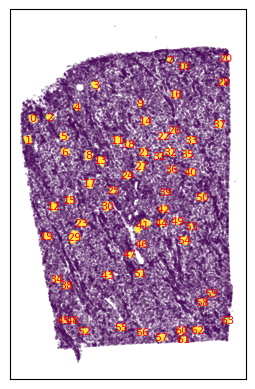

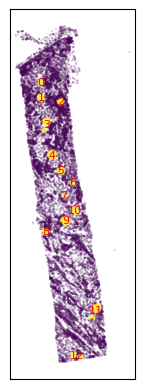

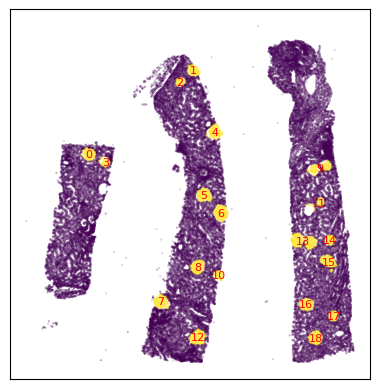

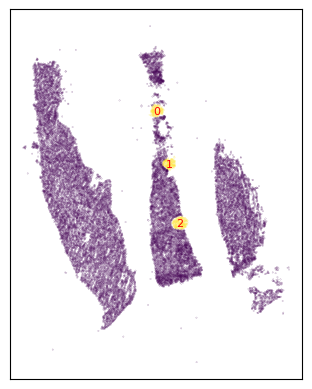

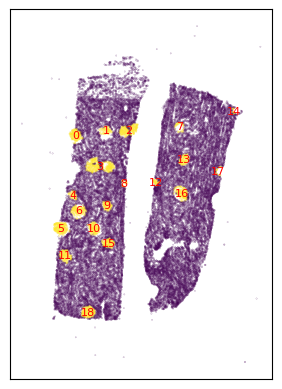

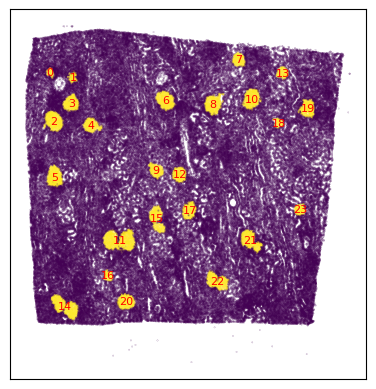

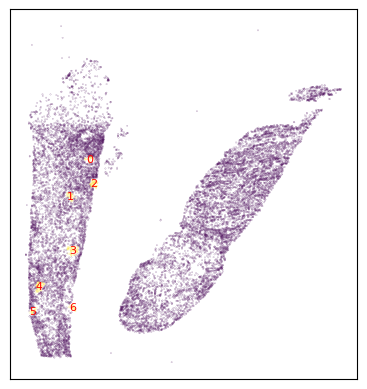

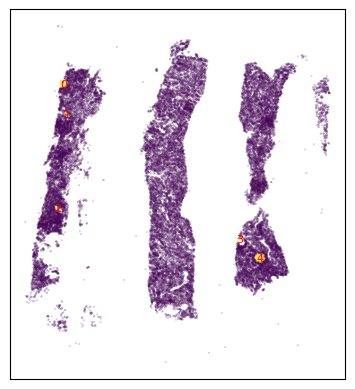

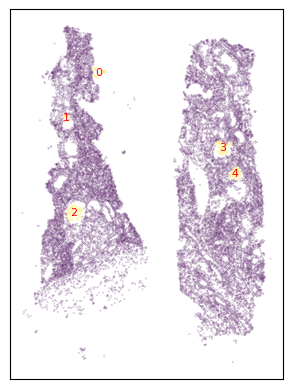

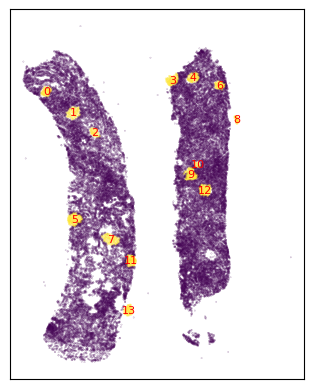

In [17]:
for sample in sample_set:

    adata_i = adata[adata.obs['sample'] == sample]
    
    dpi = 100
    plt.figure(dpi=dpi)
    
    color = [1 if i == 'Glom.' else 0 for i in adata_i.obs['nichepca_domain_tuned']]
    
    plt.scatter(adata_i.obs['x'], adata_i.obs['y'], s=.01, c=color, cmap='viridis') # other colormaps: viridis, plasma, inferno, magma, cividis
    plt.gca().set_aspect('equal', adjustable='box')
    plt.gca().invert_yaxis() 
    plt.gca().set_xticks([])
    plt.gca().set_yticks([]) 

    glom_no = adata_i.obs['nichepca_glom_no'].unique()
    for i in glom_no:
        if i != 'Other':
            centroid = adata_i.obs.loc[adata_i.obs['nichepca_glom_no'] == i, ['x', 'y']].mean()
            plt.text(centroid[0], centroid[1], f"{i}", fontsize=8, ha='center', va='center', c='red')
    
    plt.savefig(f"figure_gloms_num/sample_{sample}.pdf", format='pdf', bbox_inches='tight')
    # plt.show()